### Kaggle - Predict survival on the Titanic
#### Created: 10/29/2016
#### Author: Julianne Freeman

In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
%load_ext version_information
%version_information numpy, scipy, matplotlib, pandas

Software versions
Python 3.6.0 64bit [GCC 4.2.1 Compatible Apple LLVM 6.0 (clang-600.0.57)]
IPython 5.1.0
OS Darwin 16.1.0 x86_64 i386 64bit
numpy 1.11.3
scipy 0.18.1
matplotlib 2.0.0
pandas 0.19.2
Sun Oct 29 14:18:02 2017 EDT

In [3]:
from __future__ import division
from datetime import datetime 
import requests
from lxml import html, etree
import json
from textblob import TextBlob
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import numpy as np

#never print matching warnings
warnings.filterwarnings('ignore') 

#set how pandas displays data
pd.options.display.max_columns = 100
pd.options.display.max_rows = 35
pd.options.display.width = 120

#set to display all output
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [24]:
passengers=pd.read_csv('gender_submission.csv')
data=pd.read_csv('train.csv')

In [5]:
passengers.head(5)

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [6]:
data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Divide data into survived and died

In [7]:
data_srv=data[data['Survived']==1]
data_died=data[data['Survived']==0]

### Check for NANs

In [8]:
print('Survived')
data_srv.isnull().sum()
print('Died')
data_srv.isnull().sum()

Survived


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             52
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          206
Embarked         2
dtype: int64

Died


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             52
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          206
Embarked         2
dtype: int64

### Remove NANs

In [9]:
### Replace with average
data_srv['Age'].fillna((data_srv['Age'].mean()), inplace=True)
data_died['Age'].fillna((data_died['Age'].mean()), inplace=True)

In [10]:
print('Survived')
data_srv.isnull().sum()
print('Died')
data_srv.isnull().sum()

Survived


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          206
Embarked         2
dtype: int64

Died


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          206
Embarked         2
dtype: int64

### View Summary of Data

In [11]:
print('Survived')
data_srv.describe()
print('Died')
data_died.describe()

Survived


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,342.000000,342.0,342.000000,342.000000,342.000000,342.000000,342.000000
mean,444.368421,1.0,1.950292,28.343690,0.473684,0.464912,48.395408
std,252.358840,0.0,0.863321,13.763871,0.708688,0.771712,66.596998
min,2.000000,1.0,1.000000,0.420000,0.000000,0.000000,0.000000
25%,250.750000,1.0,1.000000,21.000000,0.000000,0.000000,12.475000
50%,439.500000,1.0,2.000000,28.343690,0.000000,0.000000,26.000000
75%,651.500000,1.0,3.000000,35.000000,1.000000,1.000000,57.000000
max,890.000000,1.0,3.000000,80.000000,4.000000,5.000000,512.329200


Died


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,549.000000,549.0,549.000000,549.000000,549.000000,549.000000,549.000000
mean,447.016393,0.0,2.531876,30.626179,0.553734,0.329690,22.117887
std,260.640469,0.0,0.735805,12.451292,1.288399,0.823166,31.388207
min,1.000000,0.0,1.000000,1.000000,0.000000,0.000000,0.000000
25%,211.000000,0.0,2.000000,23.000000,0.000000,0.000000,7.854200
50%,455.000000,0.0,3.000000,30.626179,0.000000,0.000000,10.500000
75%,675.000000,0.0,3.000000,35.000000,1.000000,0.000000,26.000000
max,891.000000,0.0,3.000000,74.000000,8.000000,6.000000,263.000000


### Record Summary of the data
- Count: More died than survived

### Possible predictors
- Lower Pclass = greater chance at survival
- Age? = similiar age btw people who survived and died
- Fewer siblings = greater chance at survival
- More parents = greater chance at survival
- Higher fare = greater chance at survival

### Still need to assess
- cabin number
- sex
- ticket number
- cabin
- point of departure

### Questions
- why is the parent count greater than 2 for some people?

### View all data. Make sure nothing looks fishy

Survived


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x123b98ba8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x12627e898>]], dtype=object)

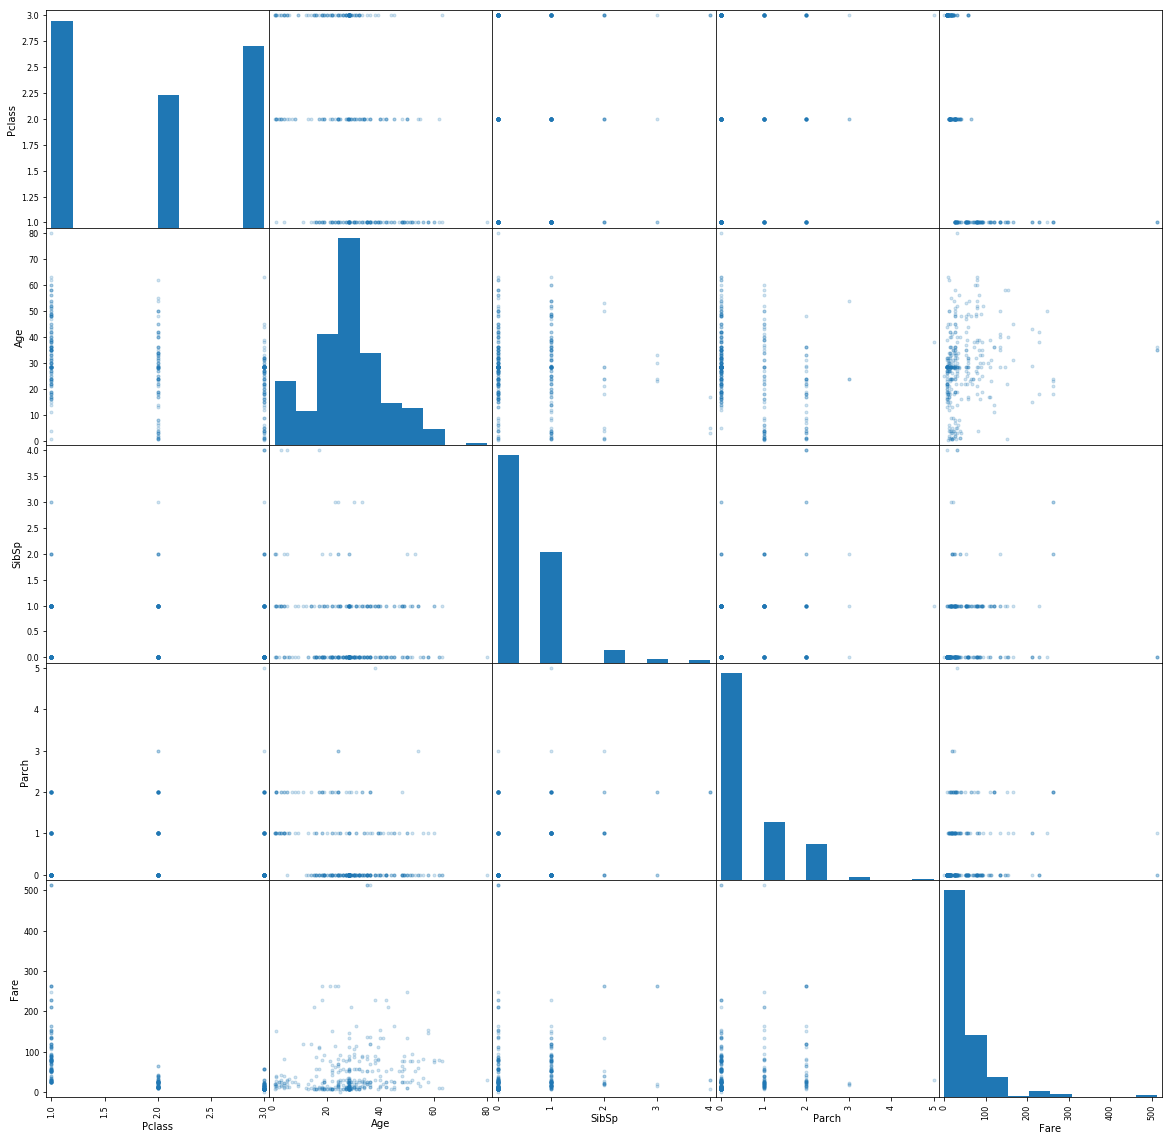

In [174]:
columns=['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
data_srv_plot = data_srv[columns]
data_died_plot = data_died[columns]

from pandas.tools import plotting
print('Survived')
plotting.scatter_matrix(data_srv_plot, figsize=(20,20), alpha=0.2)

Died


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x128e891d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x12a10f278>]], dtype=object)

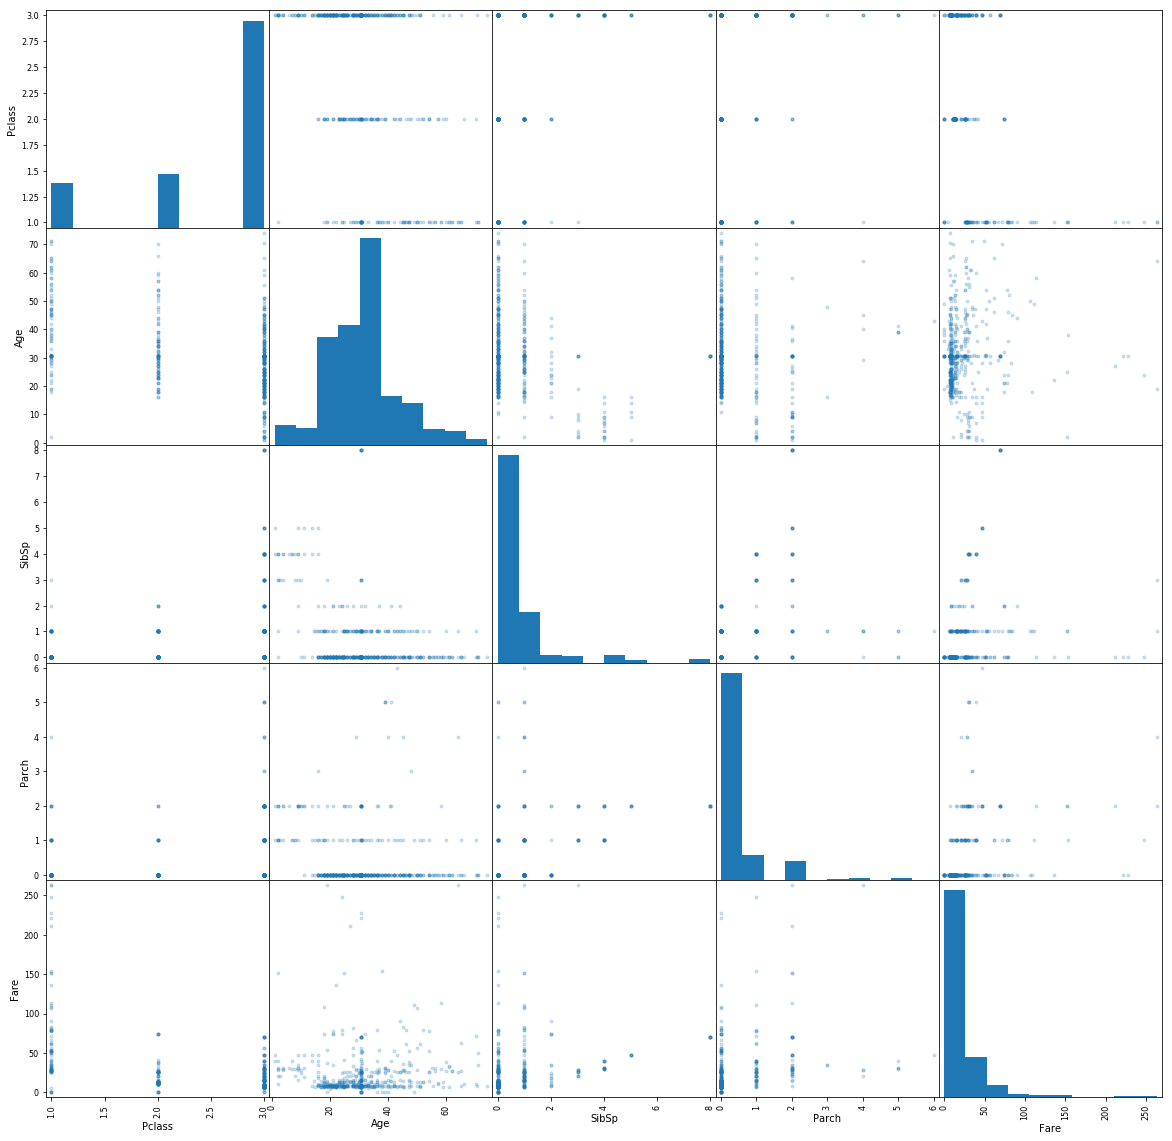

In [175]:
print('Died')
plotting.scatter_matrix(data_died_plot, figsize=(20,20), alpha=0.2)

### Graph Data

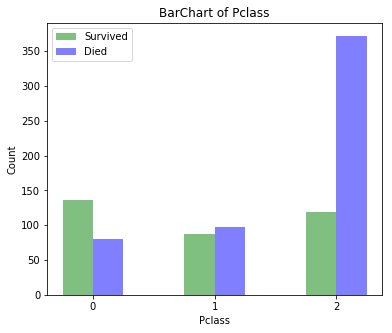

In [212]:
data_graph = data.groupby(['Survived','Pclass']).size().reset_index()
data_graph.columns = ['Survived', 'Pclass', 'Sum']
data_graph_srv=data_graph[data_graph['Survived']==1]
data_graph_died=data_graph[data_graph['Survived']==0]
pos = list(range(len(data_graph_srv['Pclass']))) 
width = 0.25
fig, ax = plt.subplots(figsize=(6,5))
_=plt.bar([p - width/2 for p in pos], data_graph_srv['Sum'], width, alpha=0.5, color='green', label='Survived')
_=plt.bar([p + width/2 for p in pos], data_graph_died['Sum'], width, alpha=0.5, color='blue', label='Died') 
_=plt.xlabel('Pclass')
_=plt.ylabel('Count')
_=plt.title('BarChart of Pclass')
_=plt.xticks([0,1,2])
_=plt.legend(['Survived', 'Died'], loc='upper left')

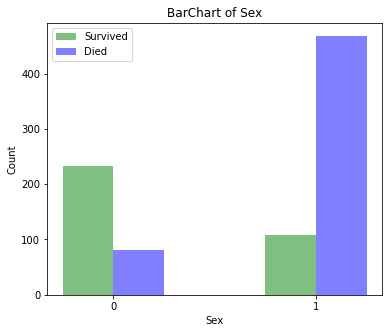

In [211]:
data_graph = data.groupby(['Survived','Sex']).size().reset_index()
data_graph.columns = ['Survived', 'Sex', 'Sum']
data_graph_srv=data_graph[data_graph['Survived']==1]
data_graph_died=data_graph[data_graph['Survived']==0]
pos = list(range(len(data_graph_srv['Sex']))) 
width = 0.25
fig, ax = plt.subplots(figsize=(6,5))
_=plt.bar([p - width/2 for p in pos], data_graph_srv['Sum'], width, alpha=0.5, color='green', label='Survived')
_=plt.bar([p + width/2 for p in pos], data_graph_died['Sum'], width, alpha=0.5, color='blue', label='Died') 
_=plt.xlabel('Sex')
_=plt.ylabel('Count')
_=plt.title('BarChart of Sex')
_=plt.xticks([0,1])
_=plt.legend(['Survived', 'Died'], loc='upper left')

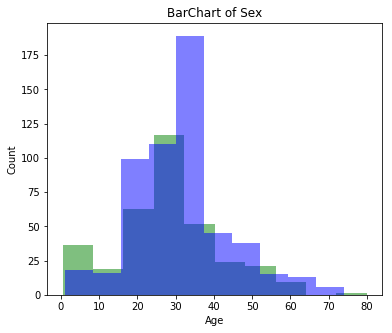

In [209]:
fig, ax = plt.subplots(figsize=(6,5))
_=plt.hist(data_srv['Age'],alpha=0.5, color='green', label='Survived')
_=plt.hist(data_died['Age'],alpha=0.5, color='blue', label='Died')
_=plt.xlabel('Age')
_=plt.ylabel('Count')
_=plt.title('BarChart of Sex')

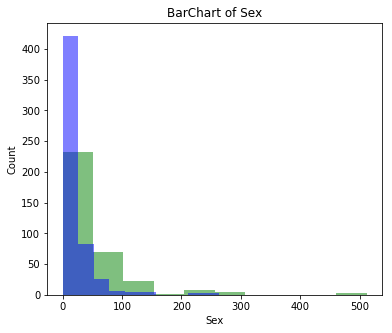

In [210]:
fig, ax = plt.subplots(figsize=(6,5))
_=plt.hist(data_srv['Fare'],alpha=0.5, color='green', label='Survived')
_=plt.hist(data_died['Fare'],alpha=0.5, color='blue', label='Died')
_=plt.xlabel('Sex')
_=plt.ylabel('Count')
_=plt.title('BarChart of Sex')

### Try Bastian's idea of graphing two variables and color based on survival

### graph age verse fare in a scatterplot

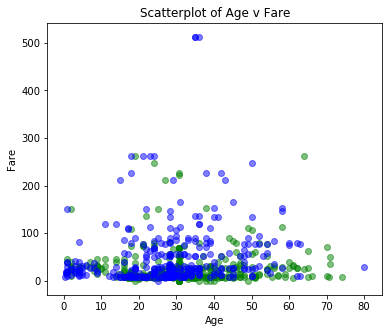

In [221]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(6,5))
_=plt.scatter(data_died['Age'], data_died['Fare'], alpha=0.5, color='green')
_=plt.scatter(data_srv['Age'], data_srv['Fare'], alpha=0.5, color='blue')
_=plt.xlabel('Age')
_=plt.ylabel('Fare')
_=plt.title('Scatterplot of Age v Fare')

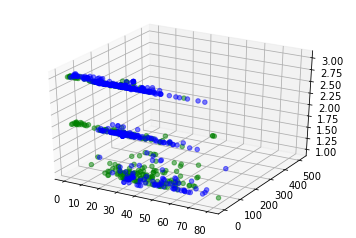

In [231]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

x1 = data_srv['Age']
y1 = data_srv['Fare']
z1 = data_srv['Pclass']

x2 = data_died['Age']
y2 = data_died['Fare']
z2 = data_died['Pclass']

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(x1, y1, z1, alpha=0.5, color='green')
ax.scatter(x2, y2, z2, alpha=0.5, color='blue')

### Attempt to do Support Vector Regression

In [241]:
x=data[['Age', 'Fare', 'Sex']]
y=data['Survived']
x.head(5)
y.head(5)

,Age,Fare,Sex
0,22.0,7.2500,male
1,38.0,71.2833,female
2,26.0,7.9250,female
3,35.0,53.1000,female
4,35.0,8.0500,male


0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [242]:
x=pd.get_dummies(x, columns=['Sex'])
x.head(5)
y.head(5)

,Age,Fare,Sex_female,Sex_male
0,22.0,7.2500,0,1
1,38.0,71.2833,1,0
2,26.0,7.9250,1,0
3,35.0,53.1000,1,0
4,35.0,8.0500,0,1


0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [244]:
#### scale data using a zscore
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
x=sc_x.fit_transform(x)
y=sc_y.fit_transform(y)

In [245]:
#### Support Vector Regression
from sklearn.svm import SVR
regressor=SVR(kernel='rbf') #regressor is an object of the module
regressor.fit(x,y) #use train data to determine regressor

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

### Try to plot Support Vector Regression with age and fare

In [9]:
from __future__ import division
from datetime import datetime 
import requests
from lxml import html, etree
import json
from textblob import TextBlob
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt

#set to display all output
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

passengers=pd.read_csv('gender_submission.csv')
data=pd.read_csv('train.csv')

print('NAN count of all data')
data.isnull().sum()
print('Change NAN of Age into mean\n')
data['Age'].fillna((data['Age'].mean()), inplace=True)
print('NAN count of all data')
data.isnull().sum()

X=data['Fare']
y=data['Survived']

NAN count of all data


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Change NAN of Age into mean

NAN count of all data


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
'''# Fit regression model
svr_rbf = SVR(kernel='rbf') #rbf
svr_lin = SVR(kernel='linear') #linear
svr_poly = SVR(kernel='poly', degree=2) #polynomial
y_rbf = svr_rbf.fit(X, y).predict(X)
y_lin = svr_lin.fit(X, y).predict(X)
y_poly = svr_poly.fit(X, y).predict(X)

# Look at the results
#lw = 2
plt.scatter(X, y, color='darkorange', label='data')
#plt.plot(X, y_rbf, color='navy', lw=lw, label='RBF model')
#plt.plot(X, y_lin, color='c', lw=lw, label='Linear model')
#plt.plot(X, y_poly, color='cornflowerblue', lw=lw, label='Polynomial model')
plt.xlabel('data')
plt.ylabel('target')
plt.title('Support Vector Regression')
plt.legend()
plt.show()'''

/Users/juliannefreeman/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


ValueError: Found input variables with inconsistent numbers of samples: [1, 891]

In [15]:
import seaborn as sns
sns.set_style('whitegrid')

fig, (axis1,axis2,axis3) = plt.subplots(1,3,figsize=(15,5))
sns.countplot(x='Sex', data=data, ax=axis1)

In [6]:
data[["Person", "Survived"]].groupby(['Person'],as_index=False).mean()

"\n# Look at the results\nlw = 2\nplt.scatter(X, y, color='darkorange', label='data')\nplt.plot(X, y_rbf, color='navy', lw=lw, label='RBF model')\nplt.plot(X, y_lin, color='c', lw=lw, label='Linear model')\nplt.plot(X, y_poly, color='cornflowerblue', lw=lw, label='Polynomial model')\nplt.xlabel('data')\nplt.ylabel('target')\nplt.title('Support Vector Regression')\nplt.legend()\nplt.show()"